Линейные графики

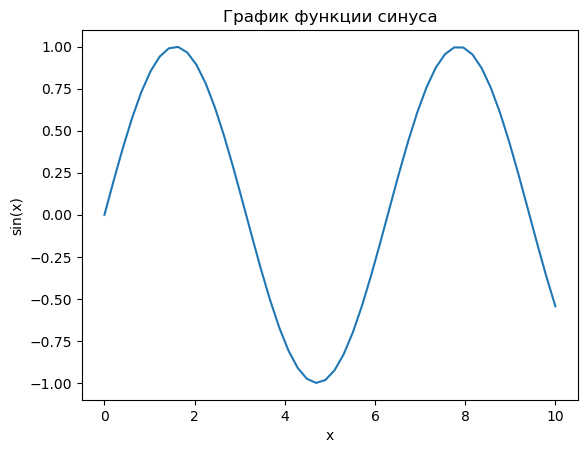

In [1]:
import matplotlib.pyplot as plt

import numpy as np



x = np.linspace(0, 10, 50)

y = np.sin(x)



plt.plot(x, y)

plt.xlabel('x')

plt.ylabel('sin(x)')

plt.title('График функции синуса')

plt.show()

Столбчатые графики

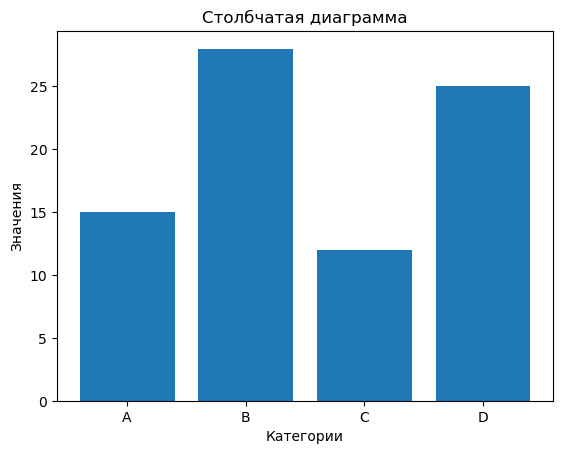

In [2]:
categories = ['A', 'B', 'C', 'D']

values = [15, 28, 12, 25]



plt.bar(categories, values)

plt.xlabel('Категории')

plt.ylabel('Значения')

plt.title('Столбчатая диаграмма')

plt.show()

Гистограммы

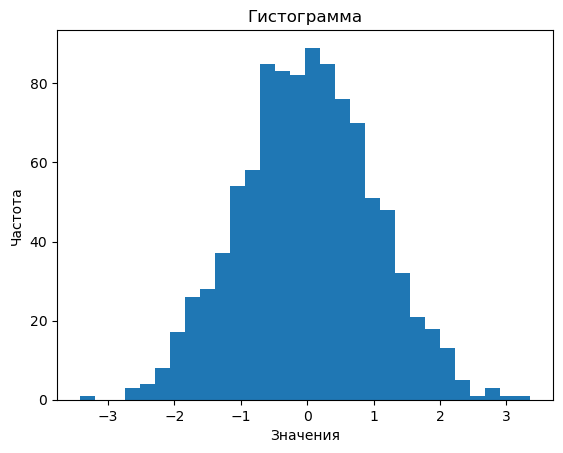

In [3]:
data = np.random.randn(1000)  # Генерируем случайные данные



plt.hist(data, bins=30)

plt.xlabel('Значения')

plt.ylabel('Частота')

plt.title('Гистограмма')

plt.show()

Scatter plot (диаграмма рассеяния)

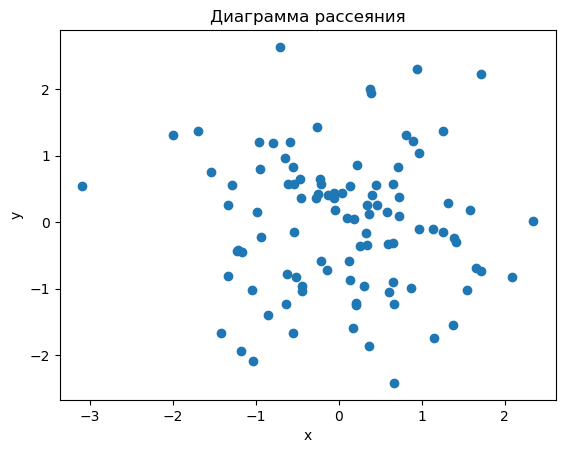

In [4]:
x = np.random.randn(100)

y = np.random.randn(100)



plt.scatter(x, y)

plt.xlabel('x')

plt.ylabel('y')

plt.title('Диаграмма рассеяния')

plt.show()

Визуализация данных о продажах

In [8]:
import pandas as pd

# Загрузка данных
sales = pd.read_csv('C:/Users/123/Downloads/sales.csv')
sales

,Дата продажи,ID товара,ID клиента,Количество,Цена,Скидка,Регион
0,2023-05-12,47,39,9,3386,15,Уральский
1,2023-07-01,42,60,8,1864,10,Сибирский
2,2023-04-27,47,84,6,3386,15,Северо-Западный
3,2023-05-09,4,33,4,9177,10,Северо-Западный
4,2023-09-05,31,28,4,1175,15,Северо-Западный
...,...,...,...,...,...,...,...
99995,2023-07-28,75,62,1,8811,0,Приволжский
99996,2023-09-01,66,99,2,3155,10,Северо-Западный
99997,2023-12-24,74,68,2,9148,0,Уральский
99998,2023-02-28,72,7,6,5416,10,Сибирский


In [9]:
sales['Скидка'] = sales['Скидка'] / 100
sales['Доход'] = (sales['Цена'] - (sales['Цена'] * sales['Скидка'])) * sales['Количество']
sales['Месяц'] = pd.DatetimeIndex(sales['Дата продажи']).month

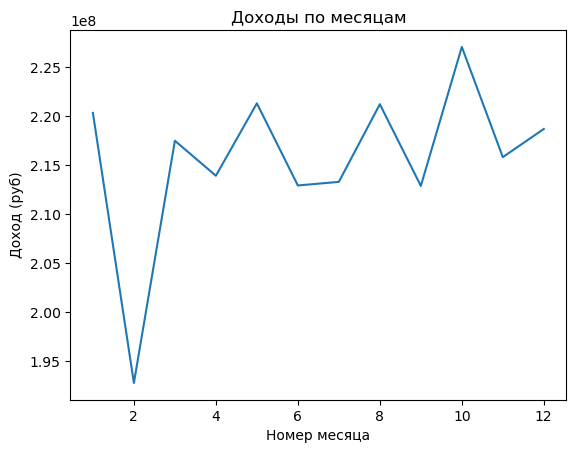

In [10]:
monthly_sales = sales.groupby('Месяц')['Доход'].sum().reset_index()

plt.plot(monthly_sales['Месяц'],monthly_sales['Доход'])
plt.xlabel('Номер месяца')
plt.ylabel('Доход (руб)')
plt.title('Доходы по месяцам')
plt.show()

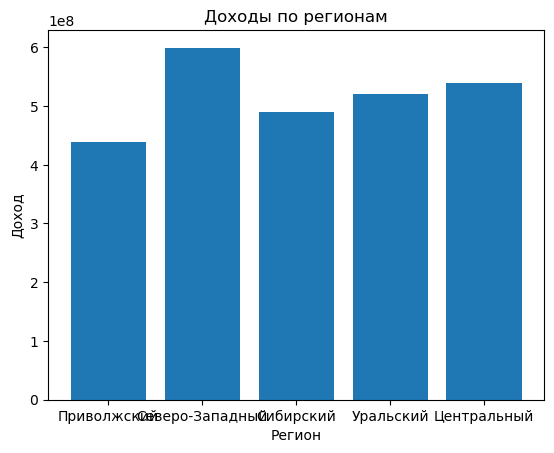

In [11]:
grouped = sales.groupby('Регион')['Доход'].sum().reset_index()

plt.bar(grouped['Регион'], grouped['Доход'])

plt.xlabel('Регион')
plt.ylabel('Доход')
plt.title('Доходы по регионам')
plt.show()

In [12]:
df = pd.read_csv('C:/Users/123/Desktop/imdb_top_1000.csv')
df = df.head(70)

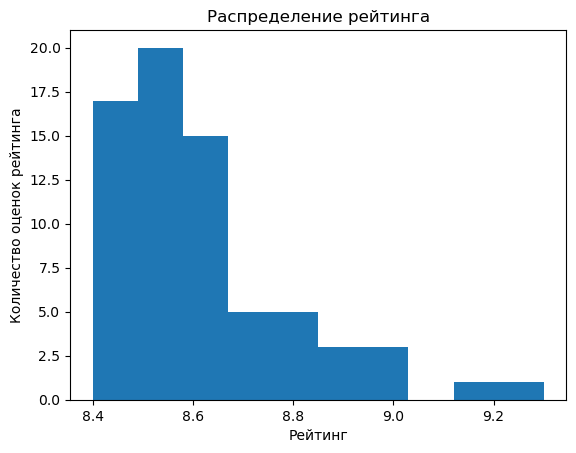

In [13]:
plt.hist(df['IMDB_Rating'])
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок рейтинга')
plt.title('Распределение рейтинга')
plt.show()

In [14]:
fig = px.scatter(df.head(100), x='IMDB_Rating', y='Gross')
fig.show()

In [15]:
df.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


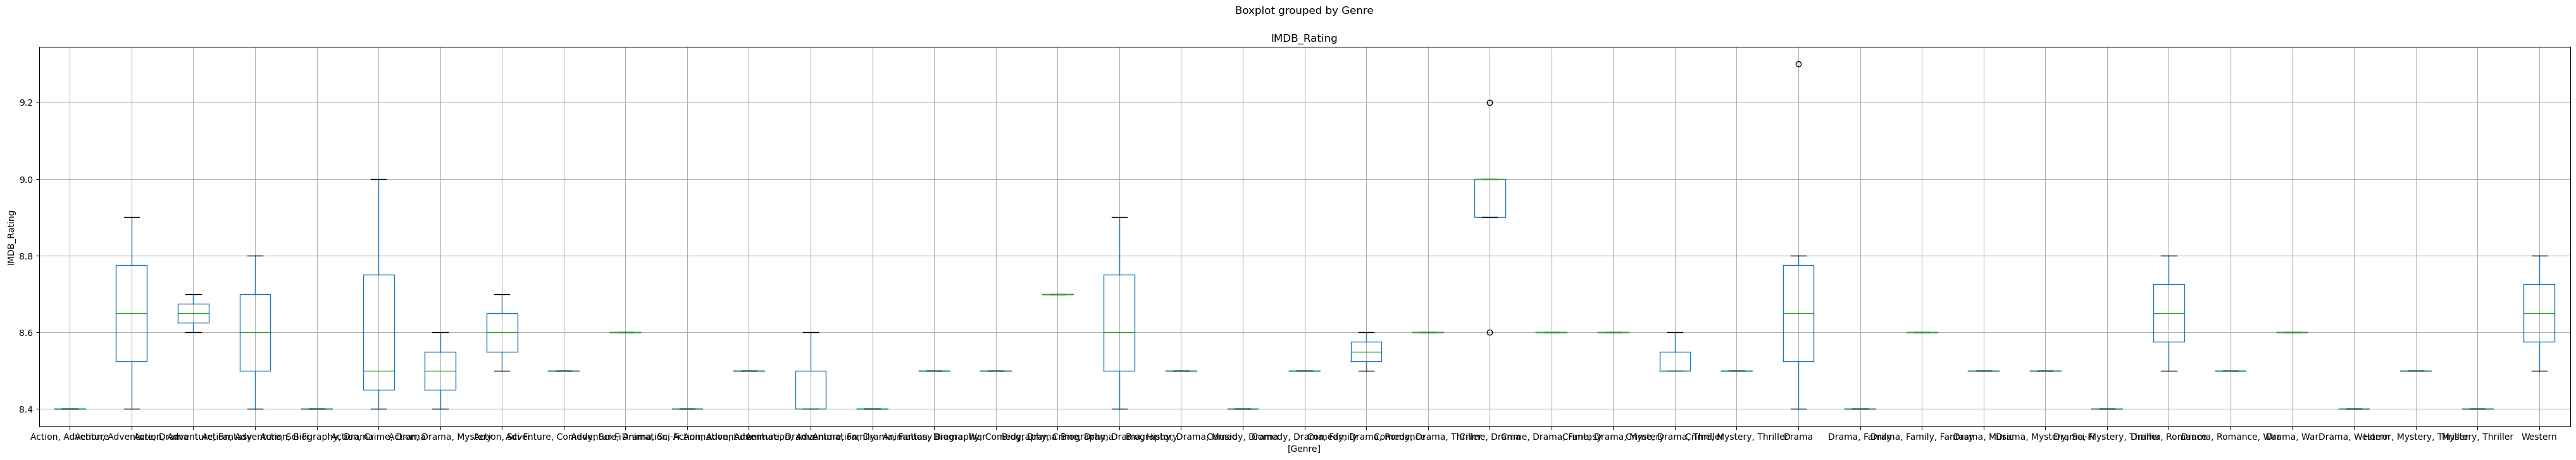

In [16]:
ax = df[['IMDB_Rating', 'Genre']].boxplot(by='Genre', figsize=(50,8))
ax.set_ylabel('IMDB_Rating');

In [17]:
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


Упр. - Создание интерактивного дашборда

In [18]:
sales_data = pd.read_csv('C:/Users/123/Downloads/sales.csv')

In [ ]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input, Output

# Преобразование даты
sales_data['Дата продажи'] = pd.to_datetime(sales_data['Дата продажи'])
sales_data['Месяц'] = sales_data['Дата продажи'].dt.to_period('M')

# Создание Dash приложения
app = JupyterDash(__name__)

# Layout приложения
app.layout = html.Div([
    html.H1("Дашборд продаж"),
    
    # Dropdown для фильтрации по месяцам
    dcc.Dropdown(
        id='month-filter',
        options=[{'label': str(month), 'value': str(month)} for month in sales_data['Месяц'].unique()],
        value=str(sales_data['Месяц'].unique()[0]),  # Значение по умолчанию
        clearable=False,
        style={'width': '50%'}
    ),
    
    # Dropdown для фильтрации по регионам
    dcc.Dropdown(
        id='region-filter',
        options=[{'label': region, 'value': region} for region in sales_data['Регион'].unique()],
        value=sales_data['Регион'].unique()[0],  # Значение по умолчанию
        clearable=False,
        style={'width': '50%'}
    ),
    
    # Dropdown для фильтрации по ID товара
    dcc.Dropdown(
        id='product-filter',
        options=[{'label': str(product), 'value': product} for product in sales_data['ID товара'].unique()],
        value=sales_data['ID товара'].unique()[0],  # Значение по умолчанию
        clearable=False,
        style={'width': '50%'}
    ),
    
    # График продаж
    dcc.Graph(id='sales-graph'),
])

# Callback для обновления графика
@app.callback(
    Output('sales-graph', 'figure'),
    [Input('month-filter', 'value'),
     Input('region-filter', 'value'),
     Input('product-filter', 'value')]
)
def update_graph(selected_month, selected_region, selected_product):
    # Фильтрация данных
    filtered_data = sales_data[(sales_data['Месяц'] == selected_month) & 
                               (sales_data['Регион'] == selected_region) &
                               (sales_data['ID товара'] == int(selected_product))]
    
    # Создание графика
    fig = px.bar(filtered_data, x='Дата продажи', y='Количество', 
                 title=f'Продажи за {selected_month} в регионе {selected_region} для товара {selected_product}')
    
    return fig

# Запуск приложения 
app.run_server(mode='inline', port=8070)


Упр. - возможности анимации в Matplotlib 

C:\Users\123\AppData\Local\Temp\ipykernel_10324\1276275880.py:17: UserWarning:

frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.



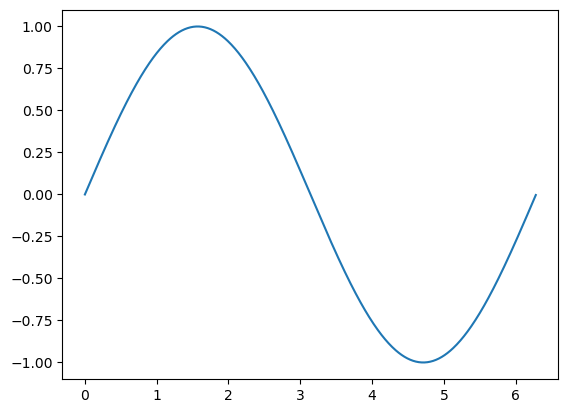

In [19]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)

line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # Обновление данных для кадра i
    return line,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True)

plt.show()

geopandas 

In [23]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


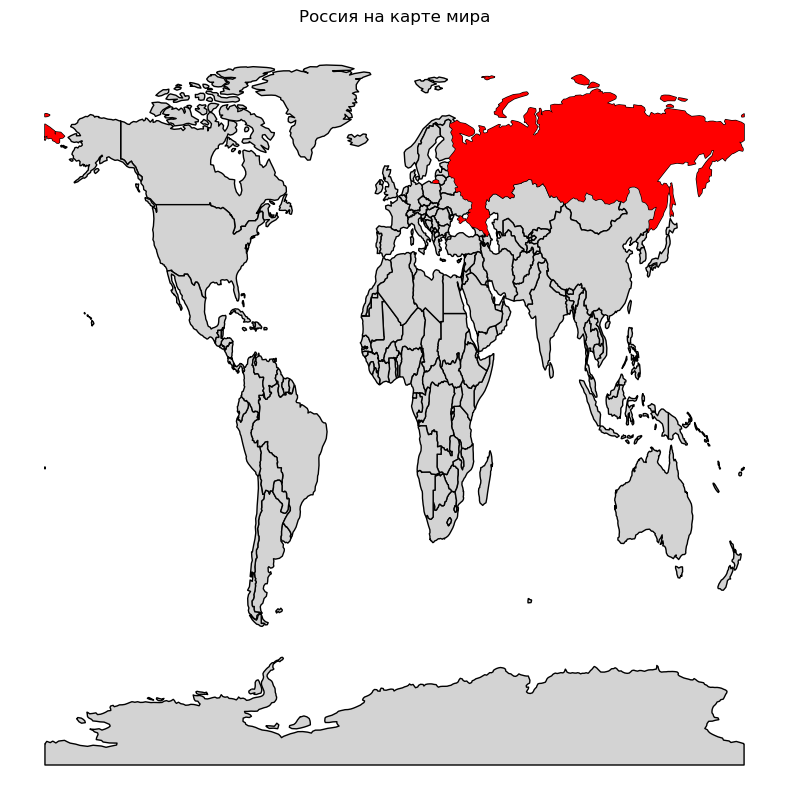

In [24]:
import geopandas as gpd
from matplotlib.pyplot import figure

path = 'C:/Users/123/Downloads/Страны/ne_110m_admin_0_countries.shp'


# Загружаем данные границ стран мира

world = gpd.read_file(path)



# Выбираем Россию по ее названию

russia = world[world.SOVEREIGNT == 'Russia']



# Создаем карту мира и выделяем Россию

ax = world.plot(color='lightgrey', edgecolor='black')

russia.plot(ax=ax, color='red')



# Настраиваем отображение карты

ax.set_axis_off()

ax.set_title("Россия на карте мира")

# Отображаем карту
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

Интерактивный дашборд с использованием Plotly Dash 

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd



# Пример данных

df = pd.DataFrame({
    "Страна": ["Россия", "США", "Китай", "Германия", "Франция", "Бразилия"],
    "Продажи": [1200, 2500, 1800, 1600, 1100, 900],
    "Прибыль": [300, 600, 450, 400, 275, 225],
    "Широта": [60, 40, 35, 50, 45, -15],
    "Долгота": [100, -100, 100, 10, 2, -50]
})



app = dash.Dash(__name__)



app.layout = html.Div(children=[
    html.H1(children="Дашборд Продаж"),
    dcc.Graph(id='sales-map'),
    dcc.Dropdown(
        id='data-dropdown',
        options=[{'label': i, 'value': i} for i in ['Продажи', 'Прибыль']],
        value='Продажи'
    ),
    html.Div(id='output-container')
])


@app.callback(
    dash.Output('sales-map', 'figure'),
    [dash.Input('data-dropdown', 'value')]
)

def update_map(selected_data):
    fig = px.scatter_geo(df,
                         lat="Широта",
                         lon="Долгота",
                         size=selected_data,
                         color=selected_data,
                         hover_name="Страна",
                         projection="natural earth")
    fig.update_layout(title=f"{selected_data} по странам")
    return fig



if __name__ == '__main__':
    app.run_server(debug=True)